## Exploratory Analysis using Jupyter Notebook
For further reading, we recommend: 
- [the pandas documentation](http://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#getting)  for information about using DataFrames
- [this blog post](https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed) for a jumpstart into visualizations
- [the matplotlib documentation](https://matplotlib.org/users/pyplot_tutorial.html) for more info about visualizations

In [46]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#### Loading data from our GPC bucket

In [ ]:
import s3fs
s3 = s3fs.S3FileSystem(anon=True)
s3.ls('twde-datalab/raw')

s3.get('twde-datalab/raw/quito_stores_sample2016-2017.csv', 
       '../data/quito_stores_sample2016-2017.csv')

In [2]:
train = pd.read_csv('../data/quito_stores_sample2016-2017.csv')

/home/lukas/.local/share/virtualenvs/continuous-intelligence-workshop-TFHS9Pyf/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data = train
train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,cluster
0,88211471,2016-08-16,44.0,103520.0,7.0,True,Quito,Pichincha,5.0
1,88211472,2016-08-16,44.0,103665.0,7.0,False,Quito,Pichincha,5.0
2,88211473,2016-08-16,44.0,105574.0,13.0,False,Quito,Pichincha,5.0
3,88211474,2016-08-16,44.0,105575.0,18.0,False,Quito,Pichincha,5.0
4,88211475,2016-08-16,44.0,105577.0,8.0,False,Quito,Pichincha,5.0


#### With just this glimpse, you can start to fill out your list of assumptions, hypotheses, and questions. Some of mine are:
- Question: What is the span of dates we are provided?
- Question: How many distinct store_nbr values are there?
- Question: How many distinct item_nbr values are there?
- Hypothesis: unit_sales are always positive
- Hypothesis: onpromotion is always either True or False
- Hypothesis: city and state are always going to be Quito and Pichincha
- Hypothesis: cluster is always 5
- Question: What does cluster mean and is it important to know?
- Question: How many records does the data contain?
- Question: What other data files are available?

### Here's some examples of how to address those first questions

In [4]:
train['date'] = pd.to_datetime(train['date'], format="%Y-%m-%d")

In [5]:
# Access an entire dataframe column like you would
# the value in a python dictionary:
# (The returned object has similar pandas built-in 
# functions, like 'head' and 'max')
print(data['date'].min())
print(data['date'].max())

2016-08-16 00:00:00
2017-01-06 00:00:00


In [6]:
# Dataframe columns also have a 'unique' method,
# which can answer several of our questions from above
data['store_nbr'].unique()

array([44., 45., 46., 47., 48., 49., nan])

In [7]:
print(data['item_nbr'].unique())
print("There are too many item numbers to display, so let's just count them for now:")
print("\n{} different item_nbr values in our data"
          .format(len(data['item_nbr'].unique())))

[ 103520.  103665.  105574. ... 2027559. 1161046.      nan]
There are too many item numbers to display, so let's just count them for now:

3555 different item_nbr values in our data


#### It might be helpful to know the 'shape' of our data. We could count by hand (for now) the columns, but how many rows do we have altogether?

In [8]:
print(data.shape)
print("There are {} rows and {} columns in our data".format(data.shape[0], data.shape[1]))

(2263569, 9)
There are 2263569 rows and 9 columns in our data


#### Moving along to answer our intial questions... Let's have a look at unit_sales. Keep in mind that unit sales is the variable we want to predict with our science.

Each row in our data is essentially telling us a `unit_sales` number for a given `item_nbr` at a given `store_nbr` on a given `date`. That is, "how many of an item was sold at a store on a day".

## unit_sales are always positive

In [9]:
data[data['unit_sales'] < 0]

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,cluster
7594,88219065,2016-08-16,46.0,1963838.0,-2.000,False,Quito,Pichincha,14.0
7692,88219163,2016-08-16,46.0,1993077.0,-2.000,False,Quito,Pichincha,14.0
51001,88497657,2016-08-19,45.0,2006144.0,-1.000,False,Quito,Pichincha,11.0
63755,88594129,2016-08-20,44.0,1950170.0,-2.000,False,Quito,Pichincha,5.0
84301,88699040,2016-08-21,46.0,1152348.0,-5.000,False,Quito,Pichincha,14.0
123218,88896156,2016-08-23,49.0,1178687.0,-1.000,False,Quito,Pichincha,11.0
123912,88896850,2016-08-23,49.0,1575231.0,-1.000,False,Quito,Pichincha,11.0
159442,89159454,2016-08-26,45.0,1464302.0,-1.000,False,Quito,Pichincha,11.0
169393,89169405,2016-08-26,49.0,1463568.0,-5.000,False,Quito,Pichincha,11.0
206853,89450432,2016-08-29,45.0,1412379.0,-2.000,False,Quito,Pichincha,11.0


## onpromotion is always either True or False

In [10]:
data['onpromotion'].unique()


array([True, False, nan], dtype=object)

In [11]:
data[data['onpromotion'].isnull()]

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,cluster
2263568,1022,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Hypothesis: city and state are always going to be Quito and Pichincha

In [12]:
data['city'].unique()

array(['Quito', nan], dtype=object)

In [13]:
data['state'].unique()

array(['Pichincha', nan], dtype=object)

## Hypothesis: cluster is always 5 => Wrong!

In [14]:
data['cluster'].unique()

array([ 5., 11., 14., nan])

In [34]:
data.groupby(['cluster']).count()
y = data['unit_sales']
X = data.drop('unit_sales', axis=1)

In [38]:
y.shape

(2263569,)

## Question: What does cluster mean and is it important to know?

cluster
5.0     [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
11.0    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
14.0    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

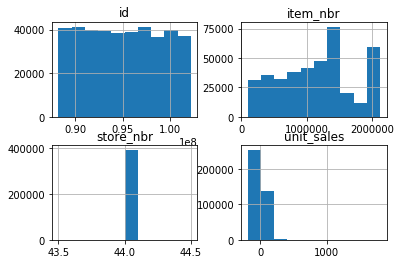

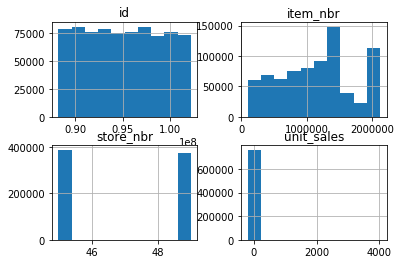

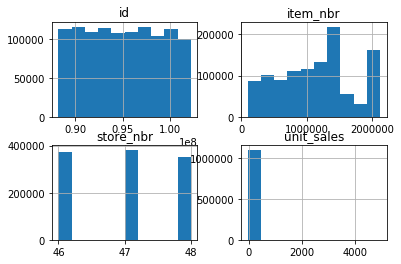

In [47]:
data.groupby(['cluster']).hist()

In [57]:
data.groupby(['cluster']).get_group(5.0)['store_nbr'].unique()

array([44.])

cluster
5.0     AxesSubplot(0.125,0.125;0.775x0.755)
11.0    AxesSubplot(0.125,0.125;0.775x0.755)
14.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: store_nbr, dtype: object

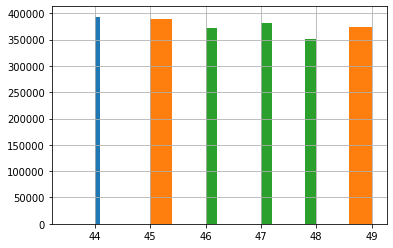

In [61]:
data.groupby(['cluster'])['store_nbr'].hist()

In [62]:
data.groupby(['cluster'])['store_nbr'].unique()

cluster
5.0                 [44.0]
11.0          [45.0, 49.0]
14.0    [46.0, 47.0, 48.0]
Name: store_nbr, dtype: object

cluster
5.0     AxesSubplot(0.125,0.125;0.775x0.755)
11.0    AxesSubplot(0.125,0.125;0.775x0.755)
14.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: unit_sales, dtype: object

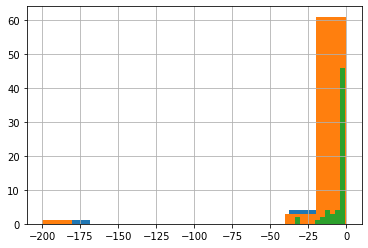

In [70]:
data[data['unit_sales'] < 0].groupby(['cluster'])['unit_sales'].hist()